In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
#read csv
crime_rate_csv = "C:\\Users\\Rob\\Downloads\\LocalCrimeTrendsInOneVar_Rate.csv"
cities_of_interest_csv = "C:\\Users\\Rob\\Downloads\\cities_of_interest.csv"

In [3]:
#import crime into dataframe
crime_rate_df = pd.read_csv(crime_rate_csv)
print(crime_rate_df.to_string())

                                      Agency State    2010    2011    2012    2013    2014
0                         Denver Police Dept    CO   564.4   607.3   615.9   630.7   601.5
1                       Hartford Police Dept    CT  1301.5  1311.1  1321.9  1179.1  1104.5
2                        Orlando Police Dept    FL  1080.2  1072.7  1017.4   914.6   901.1
3                        Chicago Police Dept    IL     NaN     NaN     NaN     NaN     NaN
4                        Detroit Police Dept    MI  2377.9  2137.4  2122.9  2071.9  1989.5
5            Saint Louis County Police Dept.    MO     NaN     NaN     NaN     NaN     NaN
6   Las Vegas Metropolitan Police Department    NV   874.5   741.4   784.0   758.0   841.1
7                        Buffalo Police Dept    NY  1377.3  1238.2  1288.7  1255.5  1227.9
8                      Rochester Police Dept    NY  1058.6   959.3   976.0  1000.7   849.5
9    Charlotte-Mecklenburg Police Department    NC   627.4   606.4   647.9   608.0   589.8

In [4]:
#import cities of interest into dataframe
cities_of_interest_df = pd.read_csv(cities_of_interest_csv)
print(cities_of_interest_df.to_string())


    Geo ID                                               City  Total Growth  Population 2017
0    12420                   Austin-Round Rock, TX Metro Area     22.479486          2115827
1    39580                             Raleigh, NC Metro Area     17.380624          1335079
2    36740           Orlando-Kissimmee-Sanford, FL Metro Area     17.319266          2509831
3    26420    Houston-The Woodlands-Sugar Land, TX Metro Area     15.889380          6892427
4    41700           San Antonio-New Braunfels, TX Metro Area     14.910303          2473974
5    19100         Dallas-Fort Worth-Arlington, TX Metro Area     14.690848          7399662
6    16740       Charlotte-Concord-Gastonia, NC-SC Metro Area     13.588950          2525305
7    34980  Nashville-Davidson--Murfreesboro--Franklin, TN...     13.563303          1903045
8    19740              Denver-Aurora-Lakewood, CO Metro Area     13.068749          2888227
9    29820        Las Vegas-Henderson-Paradise, NV Metro Area     12.9

In [5]:
#clean city names prior to merge with crime df
cities_of_interest_df['City_Clean'] = cities_of_interest_df['City'].str.split('-').str[0]
cities_of_interest_df['City_Clean'] = cities_of_interest_df['City_Clean'].str.split(',').str[0]

#replace cleaned city data and drop uncleaned columns
cities_of_interest_df['City'] = cities_of_interest_df['City_Clean']
cities_of_interest_clean_df = cities_of_interest_df.drop(columns='City_Clean')
print(cities_of_interest_clean_df.to_string())


    Geo ID         City  Total Growth  Population 2017
0    12420       Austin     22.479486          2115827
1    39580      Raleigh     17.380624          1335079
2    36740      Orlando     17.319266          2509831
3    26420      Houston     15.889380          6892427
4    41700  San Antonio     14.910303          2473974
5    19100       Dallas     14.690848          7399662
6    16740    Charlotte     13.588950          2525305
7    34980    Nashville     13.563303          1903045
8    19740       Denver     13.068749          2888227
9    29820    Las Vegas     12.956180          2204079
10   41980     San Juan    -10.046948          2112005
11   38300   Pittsburgh     -1.001959          2333367
12   17460    Cleveland     -0.805230          2058844
13   25540     Hartford     -0.336314          1210259
14   40380    Rochester     -0.215870          1077948
15   15380      Buffalo      0.100906          1136856
16   19820      Detroit      0.506025          4313002
17   41180

In [6]:
#clean crime df city names prior to merge with city df
crime_rate_df['Agency_Clean'] = crime_rate_df['Agency'].str.split('-').str[0]
crime_rate_df['Agency_Clean'] = crime_rate_df['Agency_Clean'].str.split('Police').str[0]
crime_rate_df['Agency_Clean'] = crime_rate_df['Agency_Clean'].str.split('Metropolitan').str[0]
crime_rate_df['Agency_Clean'] = crime_rate_df['Agency_Clean'].str.split('County').str[0]
crime_rate_df['Agency_Clean'] = crime_rate_df['Agency_Clean'].str.replace('Saint Louis', 'St. Louis')



#replace cleaned agency data and drop uncleaned columns
crime_rate_df['Agency'] = crime_rate_df['Agency_Clean']
crime_rate_clean_df = crime_rate_df.drop(columns='Agency_Clean')
crime_rate_clean_df.rename(columns={'Agency':'City'}, inplace=True)
crime_rate_clean_df['City'] = crime_rate_clean_df['City'].str.rstrip()
print(crime_rate_clean_df.to_string())

           City State    2010    2011    2012    2013    2014
0        Denver    CO   564.4   607.3   615.9   630.7   601.5
1      Hartford    CT  1301.5  1311.1  1321.9  1179.1  1104.5
2       Orlando    FL  1080.2  1072.7  1017.4   914.6   901.1
3       Chicago    IL     NaN     NaN     NaN     NaN     NaN
4       Detroit    MI  2377.9  2137.4  2122.9  2071.9  1989.5
5     St. Louis    MO     NaN     NaN     NaN     NaN     NaN
6     Las Vegas    NV   874.5   741.4   784.0   758.0   841.1
7       Buffalo    NY  1377.3  1238.2  1288.7  1255.5  1227.9
8     Rochester    NY  1058.6   959.3   976.0  1000.7   849.5
9     Charlotte    NC   627.4   606.4   647.9   608.0   589.8
10      Raleigh    NC   430.8   421.5   423.2   392.3     NaN
11    Cleveland    OH  1393.3  1366.4  1383.8  1485.7  1339.2
12   Pittsburgh    PA   913.4   802.3   752.0   734.3   798.1
13   Providence    RI   683.0     NaN   636.9   628.3   522.3
14    Nashville    TN  1124.3  1181.3  1216.0  1048.8  1125.4
15      

In [7]:
#merge crime & city df
city_crime = pd.merge(crime_rate_clean_df, cities_of_interest_clean_df, on="City")
print(city_crime.to_string())

           City State    2010    2011    2012    2013    2014  Geo ID  Total Growth  Population 2017
0        Denver    CO   564.4   607.3   615.9   630.7   601.5   19740     13.068749          2888227
1      Hartford    CT  1301.5  1311.1  1321.9  1179.1  1104.5   25540     -0.336314          1210259
2       Orlando    FL  1080.2  1072.7  1017.4   914.6   901.1   36740     17.319266          2509831
3       Chicago    IL     NaN     NaN     NaN     NaN     NaN   16980      0.755680          9533040
4       Detroit    MI  2377.9  2137.4  2122.9  2071.9  1989.5   19820      0.506025          4313002
5     St. Louis    MO     NaN     NaN     NaN     NaN     NaN   41180      0.626483          2807338
6     Las Vegas    NV   874.5   741.4   784.0   758.0   841.1   29820     12.956180          2204079
7       Buffalo    NY  1377.3  1238.2  1288.7  1255.5  1227.9   15380      0.100906          1136856
8     Rochester    NY  1058.6   959.3   976.0  1000.7   849.5   40380     -0.215870        

In [8]:
#calculate percentage change of crime rate
city_crime['Crime Rate Change'] = (city_crime['2014'] - city_crime['2010'])/city_crime['2014']*100
city_crime

City State    2010    2011    2012    2013    2014  Geo ID  \
0        Denver    CO   564.4   607.3   615.9   630.7   601.5   19740   
1      Hartford    CT  1301.5  1311.1  1321.9  1179.1  1104.5   25540   
2       Orlando    FL  1080.2  1072.7  1017.4   914.6   901.1   36740   
3       Chicago    IL     NaN     NaN     NaN     NaN     NaN   16980   
4       Detroit    MI  2377.9  2137.4  2122.9  2071.9  1989.5   19820   
5     St. Louis    MO     NaN     NaN     NaN     NaN     NaN   41180   
6     Las Vegas    NV   874.5   741.4   784.0   758.0   841.1   29820   
7       Buffalo    NY  1377.3  1238.2  1288.7  1255.5  1227.9   15380   
8     Rochester    NY  1058.6   959.3   976.0  1000.7   849.5   40380   
9     Charlotte    NC   627.4   606.4   647.9   608.0   589.8   16740   
10      Raleigh    NC   430.8   421.5   423.2   392.3     NaN   39580   
11    Cleveland    OH  1393.3  1366.4  1383.8  1485.7  1339.2   17460   
12   Pittsburgh    PA   913.4   802.3   752.0   734.3   798.1   38300   
13   Providence    RI   683.0     NaN   636.9   628.3   522.3   39300   
14    Nashville    TN  1124.3  1181.3  1216.0  1048.8  1125.4   34980   
15       Austin    TX   479.5   430.1   408.8   363.5   396.2   12420   
16       Dallas    TX   764.8   681.1   675.0   663.7   664.7   19100   
17      Houston    TX  1071.3   974.6   992.5   962.7   991.4   26420   
18  San Antonio    TX   635.4   519.3   503.1   630.7   539.3   41700   

    Total Growth  Population 2017  Crime Rate Change  
0      13.068749          2888227           6.167914  
1      -0.336314          1210259         -17.836125  
2      17.319266          2509831         -19.875707  
3       0.755680          9533040                NaN  
4       0.506025          4313002         -19.522493  
5       0.626483          2807338                NaN  
6      12.956180          2204079          -3.970990  
7       0.100906          1136856         -12.167115  
8      -0.215870          1077948         -24.614479  
9      13.588950          2525305          -6.375042  
10     17.380624          1335079                NaN  
11     -0.805230          2058844          -4.039725  
12     -1.001959          2333367         -14.446811  
13      1.243560          1621122         -30.767758  
14     13.563303          1903045           0.097743  
15     22.479486          2115827         -21.024735  
16     14.690848          7399662         -15.059425  
17     15.889380          6892427          -8.059310  
18     14.910303          2473974         -17.819396

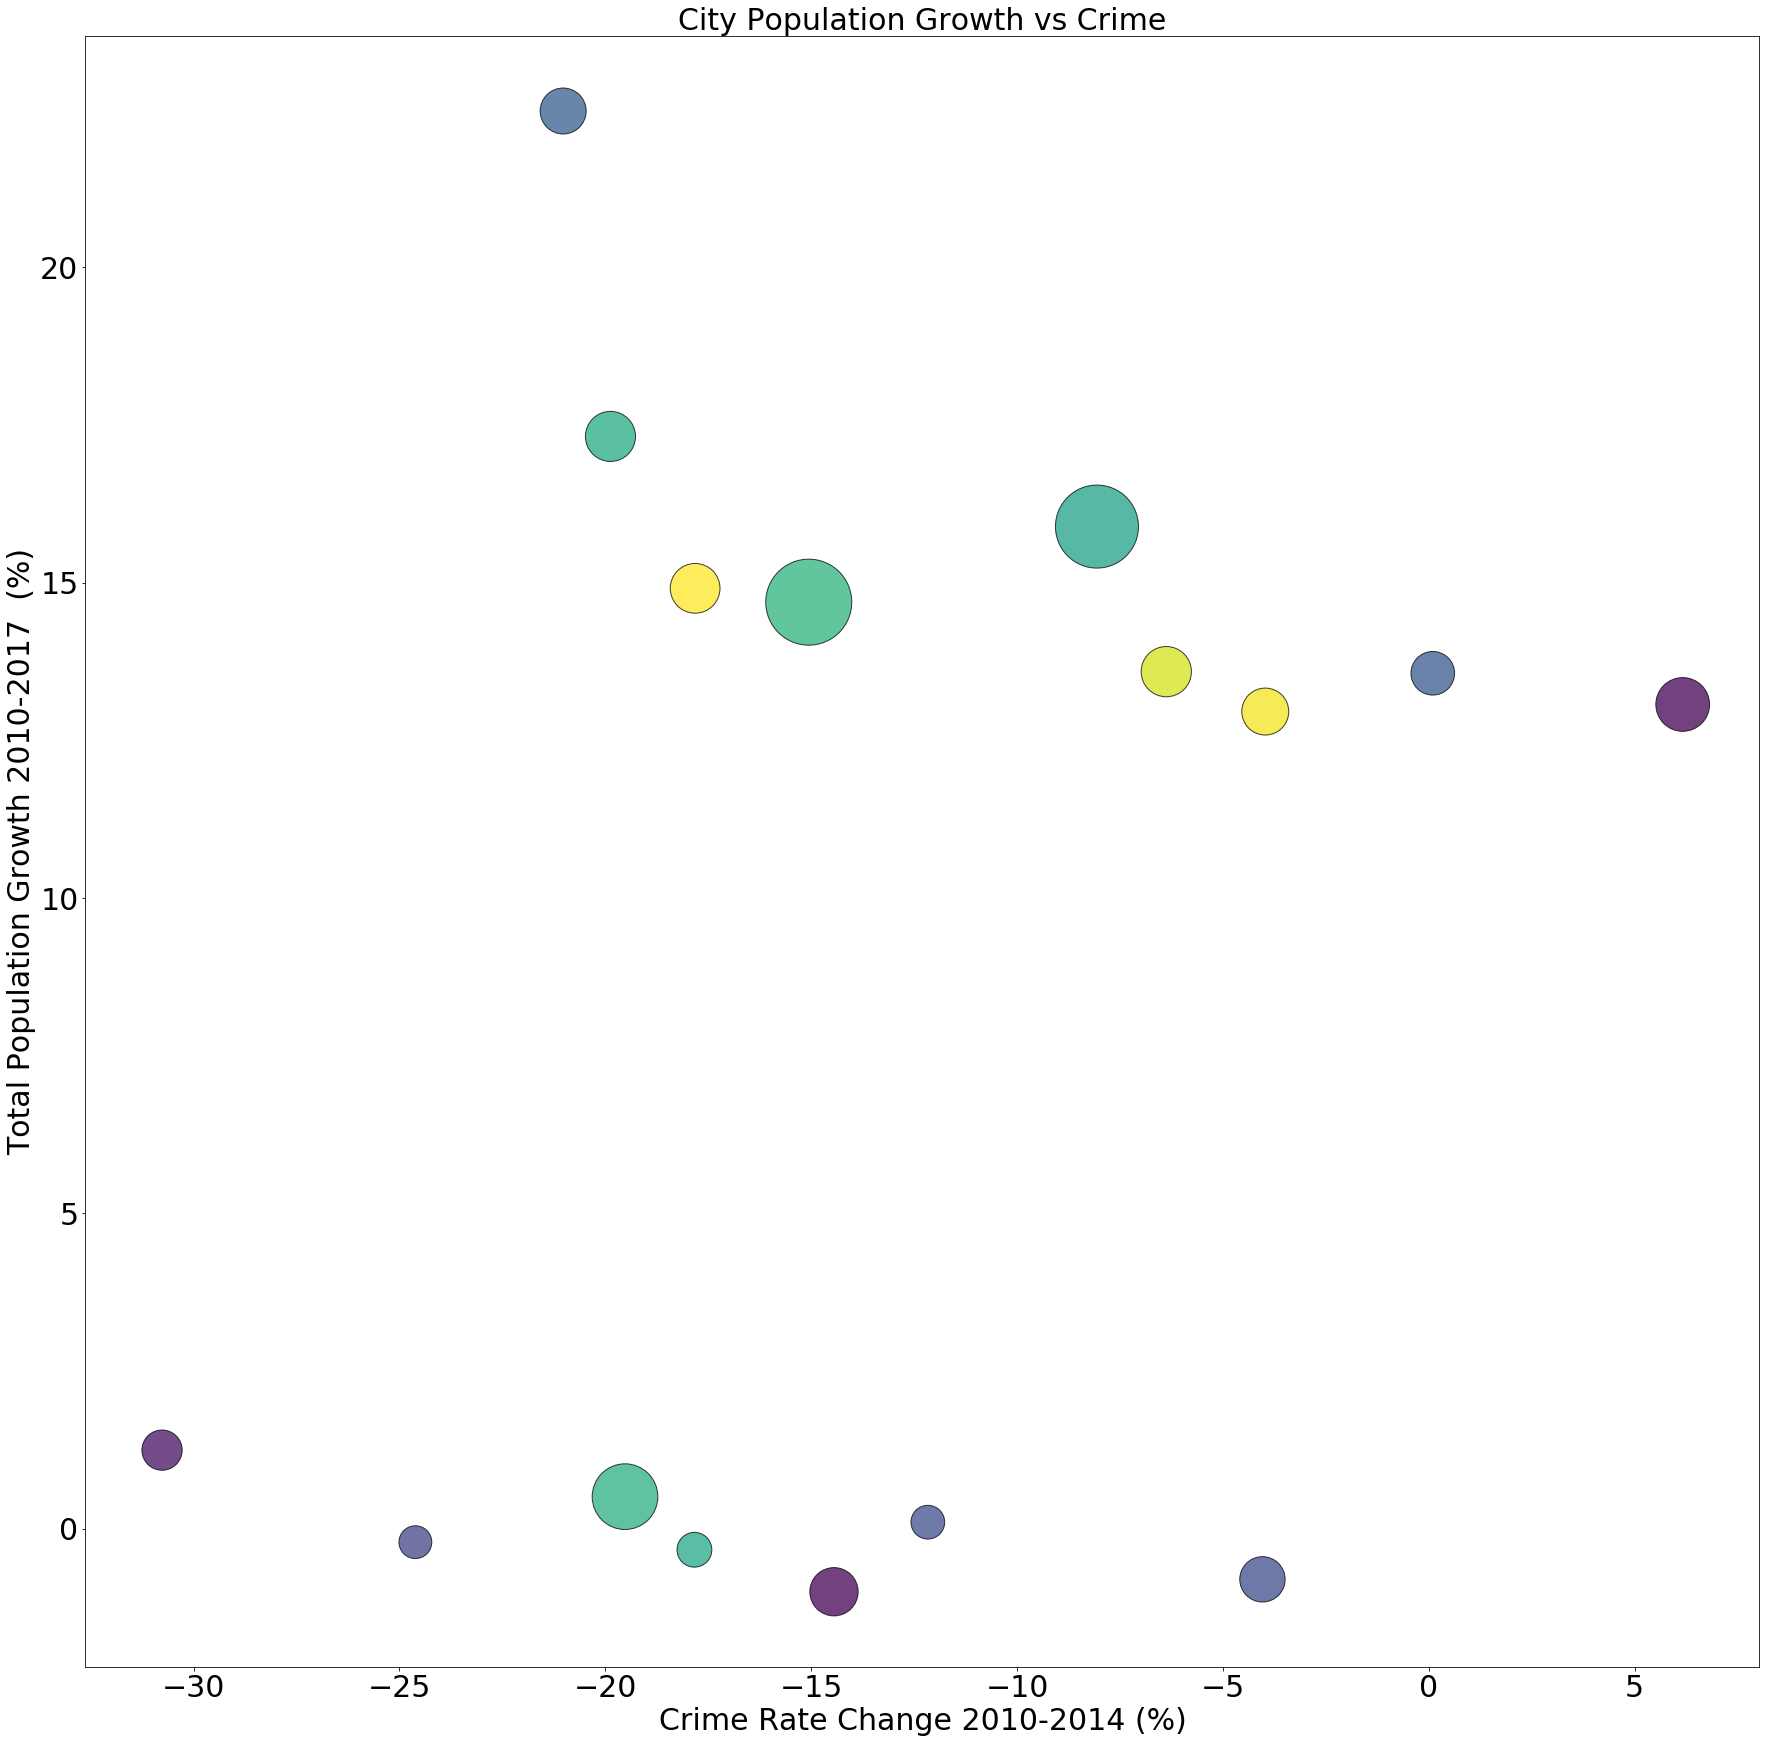

In [45]:
#bubble chart plotting crime rate and population changes
cities = list(city_crime["City"])
y_axis = city_crime["Total Growth"]
x_axis = city_crime["Crime Rate Change"]

plt.figure(figsize=(30,30))
plt.scatter(x_axis, y_axis, marker="o", c = np.random.rand(19, ), s=city_crime["Population 2017"]/1000, edgecolors="black", alpha = 0.75)

plt.title("City Population Growth vs Crime", size = 30)
plt.xlabel("Crime Rate Change 2010-2014 (%)", size = 30)
plt.ylabel("Total Population Growth 2010-2017  (%)" , size = 30)

plt.xticks(size = 30)
plt.yticks(size = 30)

plt.show()